In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
from matplotlib.image import imread
from os import listdir
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
folder = './data/images/'

In [4]:
T = pd.read_csv('food_nutrition.csv')
class_names = sorted(T[T.columns[0]])

In [5]:
datagen = keras.preprocessing.image.ImageDataGenerator(dtype='float32', rescale=1./255)

In [6]:
train_generator = datagen.flow_from_directory(
    directory = folder + 'train/',
    classes = class_names,
    class_mode = 'categorical',
    target_size=(299,299),
    batch_size = 64
)

valid_generator = datagen.flow_from_directory(
    directory = folder + 'valid/',
    classes = class_names,
    class_mode = 'categorical',
    target_size=(299,299),
    batch_size = 64
)

Found 36072 images belonging to 72 classes.
Found 35928 images belonging to 72 classes.


In [8]:
base_model = InceptionV3(weights='imagenet')

In [9]:
x = base_model.output
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=100, validation_data=valid_generator)

Epoch 1/100
564/564 [==============================] - 563s 998ms/step - loss: 4.2755 - accuracy: 0.0139 - val_loss: 4.2766 - val_accuracy: 0.0141
Epoch 2/100
564/564 [==============================] - 549s 974ms/step - loss: 4.2408 - accuracy: 0.0202 - val_loss: 4.3832 - val_accuracy: 0.0230
Epoch 3/100
564/564 [==============================] - 548s 971ms/step - loss: 4.0680 - accuracy: 0.0393 - val_loss: 4.1174 - val_accuracy: 0.0372
Epoch 4/100
564/564 [==============================] - 549s 973ms/step - loss: 3.9019 - accuracy: 0.0550 - val_loss: 4.0298 - val_accuracy: 0.0517
Epoch 5/100
564/564 [==============================] - 548s 972ms/step - loss: 3.7183 - accuracy: 0.0755 - val_loss: 3.7491 - val_accuracy: 0.0709
Epoch 6/100
564/564 [==============================] - 548s 972ms/step - loss: 3.5527 - accuracy: 0.1002 - val_loss: 4.2103 - val_accuracy: 0.0568
Epoch 7/100
564/564 [==============================] - 548s 972ms/step - loss: 3.4537 - accuracy: 0.1220 - val_loss: 3

564/564 [==============================] - 549s 973ms/step - loss: 0.6792 - accuracy: 0.7954 - val_loss: 3.0399 - val_accuracy: 0.4007
Epoch 57/100
564/564 [==============================] - 549s 973ms/step - loss: 0.4615 - accuracy: 0.8647 - val_loss: 13.9730 - val_accuracy: 0.0310
Epoch 58/100
564/564 [==============================] - 548s 972ms/step - loss: 0.8446 - accuracy: 0.7556 - val_loss: 7.0908 - val_accuracy: 0.0478
Epoch 59/100
564/564 [==============================] - 549s 973ms/step - loss: 0.7719 - accuracy: 0.7718 - val_loss: 3.1048 - val_accuracy: 0.4032
Epoch 60/100
564/564 [==============================] - 549s 974ms/step - loss: 0.4362 - accuracy: 0.8718 - val_loss: 3.5706 - val_accuracy: 0.3770
Epoch 61/100
564/564 [==============================] - 549s 973ms/step - loss: 0.3821 - accuracy: 0.8853 - val_loss: 3.6297 - val_accuracy: 0.3918
Epoch 62/100
564/564 [==============================] - 549s 973ms/step - loss: 0.4041 - accuracy: 0.8771 - val_loss: 3.5602

562/562 - 136s - loss: 3.8911 - accuracy: 0.3903


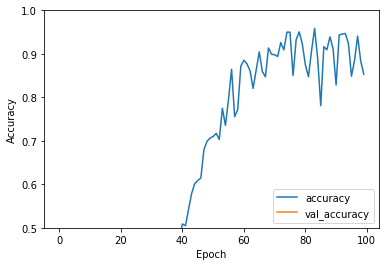

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate_generator(valid_generator, verbose=2)

In [20]:
history.history['val_accuracy']

0.4107103

In [22]:
from tensorflow.keras.models import save_model

In [24]:
save_model(history.model, './model.h5', include_optimizer=True)

In [25]:
history.model.predict_generator(valid_generator)

array([[2.1074975e-05, 3.9810367e-08, 9.0647904e-07, ..., 5.5999489e-04,
        4.1722501e-06, 9.4977439e-09],
       [4.1779927e-10, 9.2759394e-12, 4.2020840e-08, ..., 1.0699212e-07,
        4.2504598e-07, 1.6390725e-08],
       [2.2041489e-08, 5.7992635e-13, 1.1309275e-05, ..., 1.0358291e-06,
        1.0903864e-11, 2.1865801e-11],
       ...,
       [3.5470057e-10, 1.2619690e-11, 6.5501597e-11, ..., 3.7873047e-08,
        9.4747422e-12, 1.2917474e-08],
       [5.6824527e-13, 6.5566545e-12, 2.6297720e-15, ..., 5.2119742e-10,
        1.8380558e-15, 6.5248984e-10],
       [1.2010192e-12, 4.6844668e-13, 4.0570208e-14, ..., 8.7210495e-15,
        6.7824652e-13, 9.4040545e-15]], dtype=float32)